# **Análisis Exploratorio de Datos (EDA)**
#



## 1) Importe de librerias
---

In [14]:
import pandas as pd
import geopandas as gpd
import numpy as np
import json
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from ydata_profiling import ProfileReport
from shapely.geometry import MultiPolygon, mapping
from shapely import wkt

## 2) Lectura de los archivos
### (Archivos ubicados en la carpeta Datasets)
---

### - homicidios.xlsx

In [15]:
hechos=pd.read_excel('Datasets\homicidios.xlsx',sheet_name='HECHOS')
victimas=pd.read_excel('Datasets\homicidios.xlsx',sheet_name='VICTIMAS')

In [16]:
hechos.sample()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
693,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,...,NaN,TERRADA,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS


In [17]:
victimas.sample()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
217,2017-0085,2017-07-07,2017,7,7,PEATON,PEATON,MASCULINO,84,2017-07-07 00:00:00


### - camaras-fijas-de-control-vehicular.xlsx (Información adicional)

In [18]:
df_camaras=pd.read_csv('Datasets\camaras-fijas-de-control-vehicular.csv',encoding='ISO-8859-1', delimiter=';')

In [19]:
df_camaras.sample()

,Tipo de fiscalizador,Ubicación,Latitud,Longitud,Conducta fiscalizada
5,Analítica de video,Av. Rivadavia 10524,-34.639352,-58.511761,"semáforo rojo, senda peatonal, Giro indebido"


### - Municipios (municipio.json)

In [20]:
municipios_gdf = gpd.read_file("Datasets\municipio.json" )

In [21]:
municipios_gdf.sample()

,gid,fna,gna,nam,in1,fdc,sag,geometry
942,816,Comuna Bella Italia,Comuna,Bella Italia,822140,Servicio de Catastro e Información Territorial,IGN,"MULTIPOLYGON (((-61.31115 -31.20321, -61.31162..."


---
## Se prepara el dataset -Homicidios-

In [22]:
hechos.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [23]:
hechos.sample()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
384,2018-0110,1,2018-10-13,2018,10,13,03:05:00,3,"Corrientes Av. y Gallardo, Angel Av.",AVENIDA,...,NaN,"GALLARDO, ANGEL AV.","CORRIENTES AV. y GALLARDO, ANGEL AV.",15,Point (102852.69197214 103016.76479974),-58.43220014,-34.60207186,PEATON-MOTO,PEATON,MOTO


In [24]:
victimas.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


### Union de los dataframes para trabajar de manera más cómoda:

In [25]:
#renombramos la columna ID_hecho para usarla como parametro
victimas=victimas.rename(columns={'ID_hecho':'ID'})

In [26]:
#realizamos el merge
combinado = hechos.merge(victimas, on='ID', how='inner')

In [27]:
combinado.columns

Index(['ID', 'N_VICTIMAS', 'FECHA_x', 'AAAA_x', 'MM_x', 'DD_x', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA_x', 'ACUSADO', 'FECHA_y', 'AAAA_y', 'MM_y',
       'DD_y', 'ROL', 'VICTIMA_y', 'SEXO', 'EDAD', 'FECHA_FALLECIMIENTO'],
      dtype='object')

### Al haber datos repetidos se verifica cuales son y son eliminados:

In [28]:
def encontrar_columnas_diferentes(df):

    columnas_diferentes = []
    columnas_iguales = []

    for columna1 in df.columns:
        for columna2 in df.columns:
            if columna1 != columna2:
                if (df[columna1] == df[columna2]).all():
                    columnas_iguales.append((columna1, columna2))
                elif not (df[columna1] == df[columna2]).all():
                    columnas_diferentes.append((columna1, columna2))

    return columnas_iguales, columnas_diferentes

# Ejemplo de uso con tus columnas
columnas_iguales, columnas_diferentes = encontrar_columnas_diferentes(combinado[combinado.columns])

print("Pares de columnas iguales:")
for columna1, columna2 in columnas_iguales:
    print(f"{columna1} y {columna2} son iguales")


Pares de columnas iguales:
AAAA_x y AAAA_y son iguales
MM_x y MM_y son iguales
AAAA_y y AAAA_x son iguales
MM_y y MM_x son iguales



### Se encontraron 2 columnas con el mismo contenido, se realiza el drop a una de ellas:

In [29]:
combinado = combinado.drop(['AAAA_y','MM_y'],axis=1)

#### Sin embargo entre las columnas de los dataframes existian otras columnas con el mismo nombre, así que se comprueba qué es lo que esta causando estas diferencias, para eso se crea una función que devuelve los índices con anomalias.

In [30]:
indices=[]
for index, row  in combinado[['FECHA_x','FECHA_y', 'DD_x','DD_y', 'VICTIMA_x',  'VICTIMA_y']].iterrows():

    if row['FECHA_x'] !=row['FECHA_y']:
        indices.append(index)


    if row['DD_x'] !=row['DD_y']:
        indices.append(index)
    if row['VICTIMA_x'] !=row['VICTIMA_y']:
        indices.append(index)

#### Se muestran solo los indices y las columnas que deberian ser iguales, esto, en los indices que arrojó la funcion.

In [31]:
combinado[['FECHA_x','FECHA_y', 'DD_x','DD_y', 'VICTIMA_x','ACUSADO',  'VICTIMA_y','FECHA_FALLECIMIENTO' ]].iloc[indices]

,FECHA_x,FECHA_y,DD_x,DD_y,VICTIMA_x,ACUSADO,VICTIMA_y,FECHA_FALLECIMIENTO
65,2016-07-02,2016-07-03,3,3,MOTO,OBJETO FIJO,MOTO,2016-07-03 00:00:00
204,2017-05-24,2017-05-29,24,29,MOTO,SD,MOTO,2017-05-29 00:00:00
204,2017-05-24,2017-05-29,24,29,MOTO,SD,MOTO,2017-05-29 00:00:00
237,2017-09-02,2017-09-02,2,2,OBJETO FIJO,AUTO,AUTO,2017-09-02 00:00:00
238,2017-09-02,2017-09-02,2,2,OBJETO FIJO,AUTO,AUTO,2017-09-02 00:00:00
602,2020-12-05,2020-12-05,5,5,PEATON_MOTO,MOTO,PEATON,2020-12-05 00:00:00
603,2020-12-05,2020-12-05,5,5,PEATON_MOTO,MOTO,MOTO,2020-12-05 00:00:00


##### Entre las fechas encontramos que hay ciertas diferencias porque al parecer en la columna fecha proviniente de el archivo victimas corresponde a la fecha de fallecimiento y no a la fecha del suceso, por lo tanto decido quedarme la fecha que de verdad es relevante para el estudio actual que es la fecha del suceso.

In [32]:
combinado = combinado.drop(['FECHA_y','DD_y'],axis=1)

##### Verificando los valores distintos para las columnas victimas vemos que en la columna vctima proviniente del archivo hechos se da por victima a un objeto fijo y por acusado a un AUTO lo que es incoherente con la definicion de victima dada por el dataset es la siguente: Vehículo que ocupaba quien haya fallecido a se haya lastimado a raíz del hecho, o bien peatón/a. Clasificación agregada del tipo de vehículos.
##### y en el apartado de victima no esta definido el objeto fijo como una victima posible

In [33]:
combinado[combinado['VICTIMA_x']=='OBJETO FIJO']

,ID,N_VICTIMAS,FECHA_x,AAAA_x,MM_x,DD_x,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,pos x,pos y,PARTICIPANTES,VICTIMA_x,ACUSADO,ROL,VICTIMA_y,SEXO,EDAD,FECHA_FALLECIMIENTO
237,2017-0108,2,2017-09-02,2017,9,2,04:53:08,4,AV. GRAL. PAZ Y MACHAIN,GRAL PAZ,...,-58.49491054,-34.54795581,AUTO-OBJETO FIJO,OBJETO FIJO,AUTO,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,17,2017-09-02 00:00:00
238,2017-0108,2,2017-09-02,2017,9,2,04:53:08,4,AV. GRAL. PAZ Y MACHAIN,GRAL PAZ,...,-58.49491054,-34.54795581,AUTO-OBJETO FIJO,OBJETO FIJO,AUTO,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,10,2017-09-02 00:00:00


#### Esto solo pasa para este hecho asi que se confirma que se debe a un error por lo que se procedera a corregirse

In [34]:
def columns_modifier(mode,DF,columns, value, replace=None):
    df=DF.copy()
    if mode == 'swap':
        for index, row in df.iterrows():

            value_1=row[columns[0]]
            value_2=row[columns[1]]

            if value_1== value:
                temp=value_1
                df.at[index, columns[0]] = value_2
                df.at[index, columns[1]] = temp
    if mode == 'replace':
        for index, row in df.iterrows():
            to_replace=row[columns[0]]

            if to_replace == value:
                df.at[index, columns[0]] = replace
    
    return df


    

In [35]:
columns=['VICTIMA_x','ACUSADO']
combinado=columns_modifier('swap',combinado,columns,'OBJETO FIJO')

In [36]:
combinado[['FECHA_x', 'DD_x', 'VICTIMA_x','ACUSADO',  'VICTIMA_y','FECHA_FALLECIMIENTO' ]].iloc[indices]

,FECHA_x,DD_x,VICTIMA_x,ACUSADO,VICTIMA_y,FECHA_FALLECIMIENTO
65,2016-07-02,3,MOTO,OBJETO FIJO,MOTO,2016-07-03 00:00:00
204,2017-05-24,24,MOTO,SD,MOTO,2017-05-29 00:00:00
204,2017-05-24,24,MOTO,SD,MOTO,2017-05-29 00:00:00
237,2017-09-02,2,AUTO,OBJETO FIJO,AUTO,2017-09-02 00:00:00
238,2017-09-02,2,AUTO,OBJETO FIJO,AUTO,2017-09-02 00:00:00
602,2020-12-05,5,PEATON_MOTO,MOTO,PEATON,2020-12-05 00:00:00
603,2020-12-05,5,PEATON_MOTO,MOTO,MOTO,2020-12-05 00:00:00


In [37]:
indices=[]
for index, row  in combinado[['VICTIMA_x', 'VICTIMA_y']].iterrows():

    if row['VICTIMA_x'] !=row['VICTIMA_y']:
        indices.append(index)
indices

[602, 603]

In [38]:
combinado[[ 'VICTIMA_x',  'VICTIMA_y']].iloc[indices]

,VICTIMA_x,VICTIMA_y
602,PEATON_MOTO,PEATON
603,PEATON_MOTO,MOTO


##### Ahora, ya que los únicos registros que son distintos en estas columnas son estos y podemos ver que una columna repite la misma información dos veces mientras que la otra nos aporta informacion sobre cada victima, nos quedaremos con la columna VICTIMA_y que es la mas completa.

In [39]:
combinado = combinado.drop(['VICTIMA_x'],axis=1)

In [40]:
combinado.columns

Index(['ID', 'N_VICTIMAS', 'FECHA_x', 'AAAA_x', 'MM_x', 'DD_x', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'ACUSADO', 'ROL', 'VICTIMA_y', 'SEXO', 'EDAD',
       'FECHA_FALLECIMIENTO'],
      dtype='object')

In [41]:
combinado = combinado.rename(columns={'FECHA_x':'FECHA', 'AAAA_x':'AAAA', 'MM_x':'MM', 'DD_x':'DD', 'pos x':'Longitud','pos y':'Latitud', 'VICTIMA_y':'VICTIMA'})

Revisando la columna numero de victimas se encuentra una incongruencia debido al merge ya que el numero de victimas total deberia ser 717 vicitmas ya que esa es la  cantidad de registros en el archivo victimas

In [42]:
combinado['N_VICTIMAS'].sum()

761

vemos que para solucionar esto basta con igualar la columna siempre a 1

In [43]:
combinado['N_VICTIMAS']=1

In [44]:
combinado['N_VICTIMAS'].sum()

717

En este punto ya hemos completado la fusion de los archivos 

In [45]:
def encontrar_valores(df, valor_a_encontrar):
    resultados = []
    
    for columna in df.columns:
        columnas_con_valores = []
        indices_con_valores = []

        for indice, valor in df[columna].items():
            if valor == valor_a_encontrar:
                columnas_con_valores.append(columna)
                indices_con_valores.append(indice)
        
        if columnas_con_valores:
            resultados.append({
                'Columna': columna,
                'Indices': indices_con_valores
            })
    
    return resultados

In [46]:
columnasSD=encontrar_valores(combinado, 'SD')
columnasSD

[{'Columna': 'HORA', 'Indices': [536]},
 {'Columna': 'HH', 'Indices': [536]},
 {'Columna': 'LUGAR_DEL_HECHO', 'Indices': [121]},
 {'Columna': 'ACUSADO',
  'Indices': [3,
   33,
   36,
   39,
   58,
   77,
   84,
   93,
   107,
   114,
   121,
   128,
   141,
   162,
   204,
   208,
   223,
   409,
   413,
   457,
   468,
   475,
   641]},
 {'Columna': 'ROL',
  'Indices': [36, 39, 63, 77, 89, 141, 167, 208, 221, 280, 390]},
 {'Columna': 'VICTIMA', 'Indices': [36, 77, 89, 93, 141, 167, 208, 221, 280]},
 {'Columna': 'SEXO', 'Indices': [36, 39, 108, 121, 138, 141]},
 {'Columna': 'EDAD',
  'Indices': [30,
   33,
   35,
   36,
   39,
   55,
   63,
   72,
   89,
   93,
   108,
   119,
   121,
   138,
   141,
   142,
   165,
   176,
   182,
   225,
   243,
   275,
   277,
   299,
   328,
   359,
   367,
   371,
   377,
   391,
   421,
   444,
   446,
   454,
   457,
   461,
   463,
   469,
   478,
   497,
   505,
   528,
   529,
   548,
   552,
   555,
   563,
   572,
   579,
   631,
   639,
 

In [47]:
columna=['HH']
combinado=columns_modifier('replace',combinado,columna,'SD',np.nan)

In [48]:
columna=['HORA']
combinado=columns_modifier('replace',combinado,columna,'SD',np.nan)

Hasta ahora ya no hay valores SD en las columnas HORA Y HH puesto que fueron reemplazados por NaN. Ahora podriamos imputar estos valores. 

In [49]:
def convertir_hora(decimal_hora):
    # Extraer la parte entera y decimal de la hora
    horas_enteras = int(decimal_hora)
    minutos_decimales = (decimal_hora - horas_enteras) * 60

    # Formatear como cadena de tiempo (HH:MM)
    hora_formateada = f"{horas_enteras:02d}:{int(minutos_decimales):02d}"

    return hora_formateada

In [50]:
combinado['HORA']=combinado['HORA'].fillna(convertir_hora(combinado['HH'].mean()))
combinado['HH']=combinado['HH'].fillna(combinado['HH'].mean()).apply(int)

Verificamos si los resultados son correctos.

In [51]:
combinado.iloc[[536]]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,XY (CABA),Longitud,Latitud,PARTICIPANTES,ACUSADO,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
536,2019-0103,1,2019-12-18,2019,12,18,11:33,11,"PAZ, GRAL. AV. Y GRIVEO",GRAL PAZ,...,Point (94643.11254058 103831.57115061),-58.52169422,-34.59471640,MOTO-MOTO,MOTO,CONDUCTOR,MOTO,MASCULINO,24,2019-12-18 00:00:00


para finalizar con esta etapa aplicamos la funcion columns_modifier para cambiar los valores SD por NaN.

In [52]:

combinado=columns_modifier('replace',combinado,['EDAD'],'SD',np.nan)

In [54]:
combinado.to_csv('Recursos_dashboard/Datos_homicidios.csv', index=False)

## Dataset Municipio
---


##### El propósito fundamental de tener este archivo es proporcionarme datos sobre las coordenadas que delimitan cada comuna. Dado que contiene información sobre todas las comunas de Argentina, necesito realizar un filtro para extraer únicamente aquellas relacionadas con la Ciudad Autónoma de Buenos Aires (CABA).

In [55]:
comunas_filtradas = municipios_gdf[municipios_gdf['nam'].str.contains('Comuna \d+')]

Para confirmar que el filtro fue aplicado correctamente se realiza una grafica de las comunas existentes en el nuevo archivo comunas_filtradas

In [56]:
comunas_filtradas=comunas_filtradas.set_crs("EPSG:4326")

C:\Users\ememp\AppData\Local\Temp\ipykernel_15348\752988342.py:41: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  comunas_filtradas['centroid'] = comunas_filtradas['geometry'].centroid
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


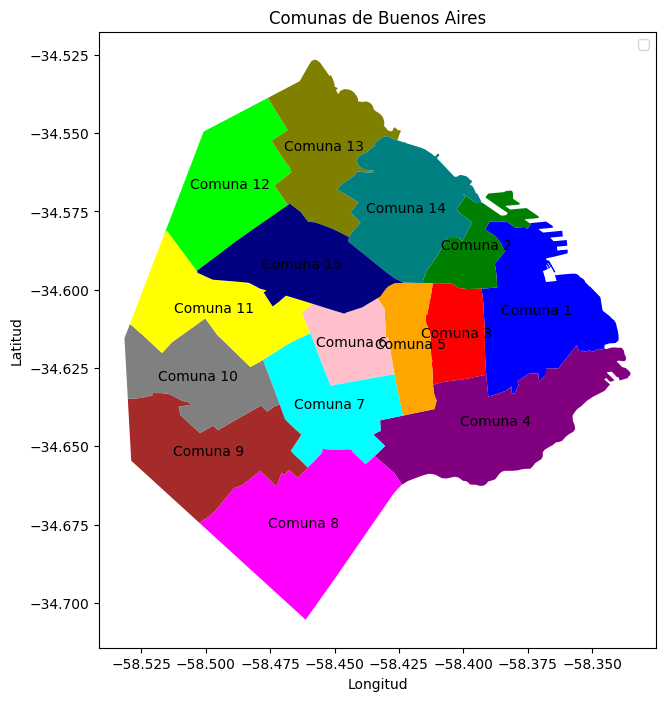

In [57]:
comunas_color = {
    'Comuna 1': 'blue',
    'Comuna 2': 'green',
    'Comuna 3': 'red',
    'Comuna 4': 'purple',
    'Comuna 5': 'orange',
    'Comuna 6': 'pink',
    'Comuna 7': 'cyan',
    'Comuna 8': 'magenta',
    'Comuna 9': 'brown',
    'Comuna 10': 'gray',
    'Comuna 11': 'yellow',
    'Comuna 12': 'lime',
    'Comuna 13': 'olive',
    'Comuna 14': 'teal',
    'Comuna 15': 'navy'
}


# Grafico
fig, ax = plt.subplots(figsize=(12, 8))

legend_handles = []
for comuna, color in comunas_color.items():
    patch = Patch(color=color, label=comuna)
    legend_handles.append(patch)
    comunas_filtradas[comunas_filtradas['nam'] == comuna].plot(ax=ax, color=color)

# Leyenda
ax.legend(handles=legend_handles)

# Título del gráfico
ax.set_title("Comunas de Buenos Aires")

# Etiquetas de los ejes
ax.set_xlabel("Longitud")
ax.set_ylabel("Latitud")


# Calcular los centroides en el sistema de coordenadas de tus ubicaciones
comunas_filtradas['centroid'] = comunas_filtradas['geometry'].centroid

# Mostrar los nombres de las comunas en el gráfico
for x, y, label in zip(comunas_filtradas['centroid'].x, comunas_filtradas['centroid'].y, comunas_filtradas['nam']):
    ax.text(x, y, label, fontsize=10, ha='center', va='center')

# Mostrar la leyenda
ax.legend()


# Mostrar el gráfico
plt.show()

In [58]:
comunas_filtradas

,gid,fna,gna,nam,in1,fdc,sag,geometry,centroid
68,1698,Comuna 13,Comuna,Comuna 13,022091,Direc. de Catastro,IGN,"MULTIPOLYGON (((-58.45535 -34.52776, -58.45404...",POINT (-58.45396 -34.55418)
69,1705,Comuna 1,Comuna,Comuna 1,022007,Direc. de Catastro,IGN,"MULTIPOLYGON (((-58.38609 -34.57823, -58.38592...",POINT (-58.37151 -34.60644)
1725,1703,Comuna 3,Comuna,Comuna 3,022021,Direc. de Catastro,IGN,"MULTIPOLYGON (((-58.41026 -34.59811, -58.40939...",POINT (-58.40265 -34.61384)
1735,1694,Comuna 7,Comuna,Comuna 7,022049,Direc. de Catastro,IGN,"MULTIPOLYGON (((-58.45900 -34.61475, -58.45846...",POINT (-58.45189 -34.63655)
1742,1695,Comuna 10,Comuna,Comuna 10,022070,Direc. de Catastro,IGN,"MULTIPOLYGON (((-58.48830 -34.62018, -58.48817...",POINT (-58.50281 -34.62784)
1749,1696,Comuna 11,Comuna,Comuna 11,022077,Direc. de Catastro,IGN,"MULTIPOLYGON (((-58.49835 -34.59639, -58.49714...",POINT (-58.49684 -34.60610)
1757,1697,Comuna 15,Comuna,Comuna 15,022105,Direc. de Catastro,IGN,"MULTIPOLYGON (((-58.46600 -34.57335, -58.46496...",POINT (-58.46277 -34.59188)
1758,1699,Comuna 14,Comuna,Comuna 14,022098,Direc. de Catastro,IGN,"MULTIPOLYGON (((-58.42673 -34.55204, -58.42672...",POINT (-58.42229 -34.57387)
1768,1700,Comuna 2,Comuna,Comuna 2,022014,Direc. de Catastro,IGN,"MULTIPOLYGON (((-58.38359 -34.57339, -58.38180...",POINT (-58.39490 -34.58579)
1770,1701,Comuna 8,Comuna,Comuna 8,022056,Direc. de Catastro,IGN,"MULTIPOLYGON (((-58.44910 -34.65118, -58.44879...",POINT (-58.46187 -34.67452)


In [59]:
comunas_filtradas.to_csv('mapa_comunas.csv', index=False)

notamos que corresponde con el mapa de comunas de Buenos Aires procederemos a añadirle la columna COMUNA al df_camaras

In [60]:
gdf = gpd.GeoDataFrame(df_camaras, geometry=gpd.points_from_xy(df_camaras.Longitud, df_camaras.Latitud))

In [61]:
gdf=gdf.set_crs("EPSG:4326")

In [62]:
gdf

,Tipo de fiscalizador,Ubicación,Latitud,Longitud,Conducta fiscalizada,geometry
0,Analítica de video,Av. Juan Bautista Alberdi 890,-34.622930,-58.440559,"semáforo rojo, senda peatonal",POINT (-58.44056 -34.62293)
1,Analítica de video,Av. Juan B. Justo 3969,-34.604166,-58.458205,"semáforo rojo, senda peatonal, Giro indebido",POINT (-58.45820 -34.60417)
2,Analítica de video,AV. Rivadavia 4987,-34.618095,-58.436090,"semáforo rojo, senda peatonal",POINT (-58.43609 -34.61809)
3,Analítica de video,Bernardo de Yrigoyen 1026,-34.620115,-58.380142,semáforo rojo,POINT (-58.38014 -34.62011)
4,Analítica de video,Av. Cordoba 6287,-34.582832,-58.448598,semáforo rojo,POINT (-58.44860 -34.58283)
...,...,...,...,...,...,...
210,Cinemómetro,Av. Jorge Newbery 4733,-34.594573,-58.457205,Exceso de velocidad,POINT (-58.45721 -34.59457)
211,Cinemómetro,Av. Chiclana 3474,-34.636013,-58.413545,Exceso de velocidad,POINT (-58.41354 -34.63601)
212,Cinemómetro,Av. Honorio Pueyrredon 1815,-34.600777,-58.451289,Exceso de velocidad,POINT (-58.45129 -34.60078)
213,Cinemómetro,Av. Pedro Goyena 805,-34.626220,-58.439244,Exceso de velocidad,POINT (-58.43924 -34.62622)


In [63]:
comunas_filtradas

,gid,fna,gna,nam,in1,fdc,sag,geometry,centroid
68,1698,Comuna 13,Comuna,Comuna 13,022091,Direc. de Catastro,IGN,"MULTIPOLYGON (((-58.45535 -34.52776, -58.45404...",POINT (-58.45396 -34.55418)
69,1705,Comuna 1,Comuna,Comuna 1,022007,Direc. de Catastro,IGN,"MULTIPOLYGON (((-58.38609 -34.57823, -58.38592...",POINT (-58.37151 -34.60644)
1725,1703,Comuna 3,Comuna,Comuna 3,022021,Direc. de Catastro,IGN,"MULTIPOLYGON (((-58.41026 -34.59811, -58.40939...",POINT (-58.40265 -34.61384)
1735,1694,Comuna 7,Comuna,Comuna 7,022049,Direc. de Catastro,IGN,"MULTIPOLYGON (((-58.45900 -34.61475, -58.45846...",POINT (-58.45189 -34.63655)
1742,1695,Comuna 10,Comuna,Comuna 10,022070,Direc. de Catastro,IGN,"MULTIPOLYGON (((-58.48830 -34.62018, -58.48817...",POINT (-58.50281 -34.62784)
1749,1696,Comuna 11,Comuna,Comuna 11,022077,Direc. de Catastro,IGN,"MULTIPOLYGON (((-58.49835 -34.59639, -58.49714...",POINT (-58.49684 -34.60610)
1757,1697,Comuna 15,Comuna,Comuna 15,022105,Direc. de Catastro,IGN,"MULTIPOLYGON (((-58.46600 -34.57335, -58.46496...",POINT (-58.46277 -34.59188)
1758,1699,Comuna 14,Comuna,Comuna 14,022098,Direc. de Catastro,IGN,"MULTIPOLYGON (((-58.42673 -34.55204, -58.42672...",POINT (-58.42229 -34.57387)
1768,1700,Comuna 2,Comuna,Comuna 2,022014,Direc. de Catastro,IGN,"MULTIPOLYGON (((-58.38359 -34.57339, -58.38180...",POINT (-58.39490 -34.58579)
1770,1701,Comuna 8,Comuna,Comuna 8,022056,Direc. de Catastro,IGN,"MULTIPOLYGON (((-58.44910 -34.65118, -58.44879...",POINT (-58.46187 -34.67452)


#### Este archivo con la informacion geoespacial de las comunas de Buenos Aires será muy útil para la elaboracion del dashboard por esa razon decido volver a guardarlo. 

In [68]:
comunas=comunas_filtradas[['geometry','nam']]
comunas.rename(columns={'nam':'COMUNA'}, inplace=True)


# Mantén solo las columnas 'geometry' y 'nam'
comunas = comunas[['geometry', 'COMUNA']]
comunas['COMUNA'] = comunas['COMUNA'].str.replace('Comuna', '').str.strip()

# Creamos un GeoDataFrame
gdf = gpd.GeoDataFrame(comunas, geometry='geometry')

# Guardamos el GeoDataFrame como GeoJSON
gdf.to_file('Recursos_dashboard\comunas_buenos_aires.json', driver='GeoJSON')


C:\Users\ememp\AppData\Local\Temp\ipykernel_15348\3182289968.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comunas.rename(columns={'nam':'COMUNA'}, inplace=True)


In [69]:
camaras_con_comunas = gpd.sjoin(gdf, comunas_filtradas, predicate='within')

In [ ]:
print(camaras_con_comunas.columns)


camaras_con_comunas = camaras_con_comunas[['Tipo de fiscalizador','Ubicación','Conducta fiscalizada','Latitud','Longitud','geometry','nam']]


In [71]:
len(camaras_con_comunas['nam'].unique())

15

In [77]:
camaras_con_comunas.sample(5)

,geometry,COMUNA,index_right,gid,fna,gna,nam,in1,fdc,sag,centroid
1772,"MULTIPOLYGON (((-58.35517 -34.61945, -58.35511...",4,1772,1706,Comuna 4,Comuna,Comuna 4,022028,Direc. de Catastro,IGN,POINT (-58.38762 -34.64210)
1770,"MULTIPOLYGON (((-58.44910 -34.65118, -58.44879...",8,1770,1701,Comuna 8,Comuna,Comuna 8,022056,Direc. de Catastro,IGN,POINT (-58.46187 -34.67452)
1735,"MULTIPOLYGON (((-58.45900 -34.61475, -58.45846...",7,1735,1694,Comuna 7,Comuna,Comuna 7,022049,Direc. de Catastro,IGN,POINT (-58.45189 -34.63655)
69,"MULTIPOLYGON (((-58.38609 -34.57823, -58.38592...",1,69,1705,Comuna 1,Comuna,Comuna 1,022007,Direc. de Catastro,IGN,POINT (-58.37151 -34.60644)
1758,"MULTIPOLYGON (((-58.42673 -34.55204, -58.42672...",14,1758,1699,Comuna 14,Comuna,Comuna 14,022098,Direc. de Catastro,IGN,POINT (-58.42229 -34.57387)


renombramos la columna nam y eliminamos la palabra comuna de todos los registros

In [89]:
camaras_con_comunas.rename(columns={'nam':'COMUNA'}, inplace=True)

In [ ]:
camaras_con_comunas['COMUNA'] = camaras_con_comunas['COMUNA'].str.replace('Comuna', '').str.strip()

In [85]:
camaras_con_comunas.sample()

,geometry,COMUNA,index_right,gid,fna,gna,COMUNA,in1,fdc,sag,centroid
69,"MULTIPOLYGON (((-58.38609 -34.57823, -58.38592...",1,69,1705,Comuna 1,Comuna,Comuna 1,022007,Direc. de Catastro,IGN,POINT (-58.37151 -34.60644)


In [87]:
camaras_con_comunas.to_csv('Datasets/Datos_camaras.csv', index=False)

## Relacion entre las comunas y el tipo de fiscalizador

In [ ]:
pivot_df = camaras_con_comunas.pivot_table(index='COMUNA', columns='Tipo de fiscalizador', aggfunc='size', fill_value=0)
pivot_df.plot(kind='bar', stacked=True, cmap='tab20')
plt.title('Relación entre Comuna y Tipo de Fiscalizador')
plt.xlabel('Comuna')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.legend(title='Tipo de Fiscalizador', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

vemos que la comuna con mayor cantidad de cinemometros es la 13 lo que parece ser relevante ya que esta comuna no reporta gran cantidad de homicidios si se le compara con la 1

## Relacion AAAA - N_VICTIMAS

<Axes: xlabel='AAAA'>

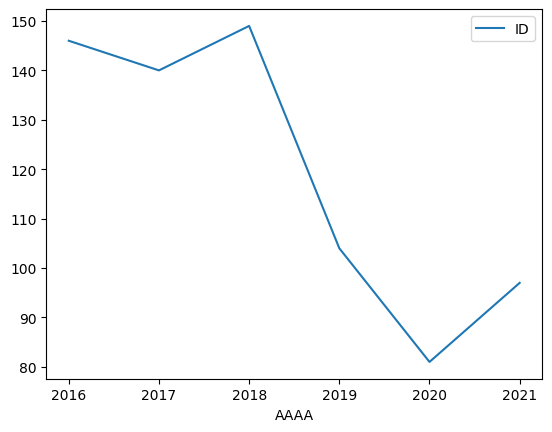

In [ ]:
victimas_por_fecha = combinado.groupby('AAAA')['N_VICTIMAS'].count().reset_index()
victimas_por_fecha=victimas_por_fecha.set_index('AAAA')
victimas_por_fecha.plot()

se observa un minimo relativo en el año 2020 lo que se le podria abjudicar al aislamiento producido por la pandemia de covid 19 sin embargo la tendencia bajista parece provenir de años anteriores a la pandemia alcanzandose el minimo en el 2020

## Relacion COMUNA - N_VICTIMAS

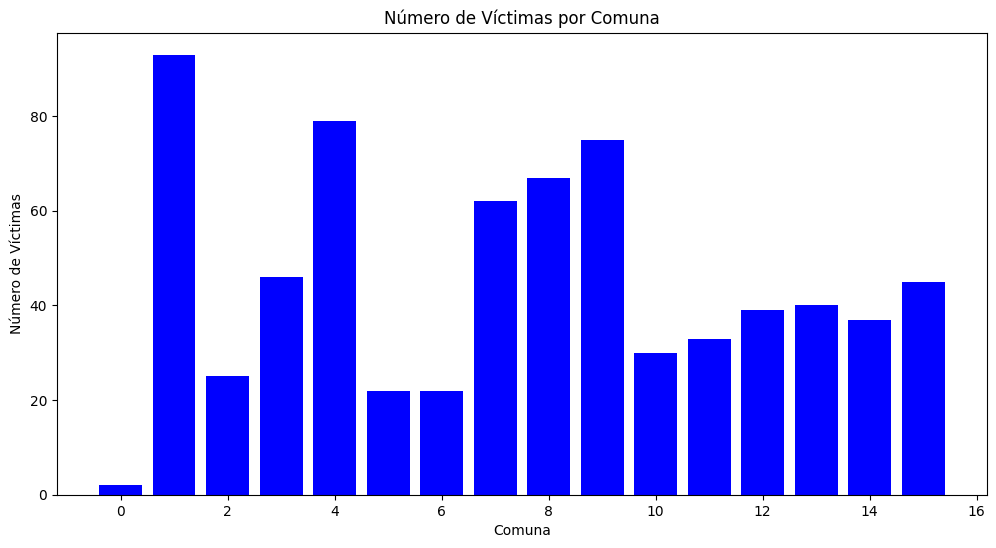

In [ ]:
victimas_por_comuna = combinado.groupby('COMUNA')['N_VICTIMAS'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.bar(victimas_por_comuna['COMUNA'], victimas_por_comuna['N_VICTIMAS'], color='blue')
plt.title('Número de Víctimas por Comuna')
plt.xlabel('Comuna')
plt.ylabel('Número de Víctimas')
plt.show()

Se observa la comuna 1 como la que tiene la mayor cantidad de victimas. Las razones de esto seran objeto de estudio 

## Relacion SEXO-N_VICTIMAS

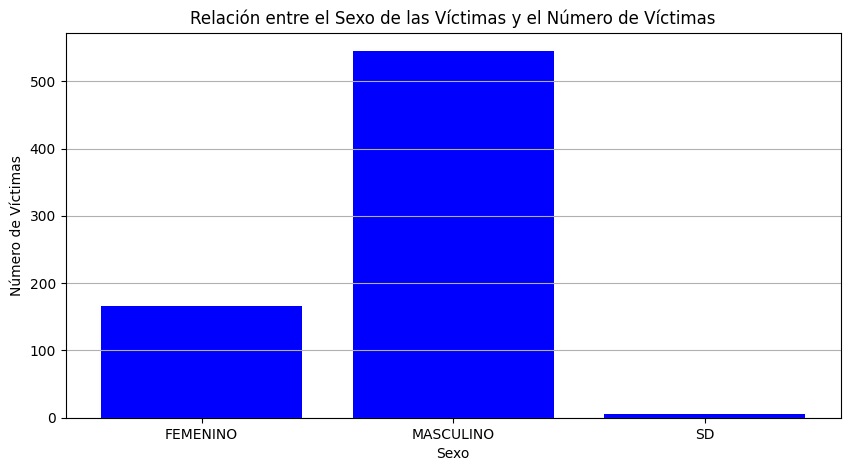

In [ ]:
victimas_por_sexo = combinado.groupby('SEXO')['VICTIMA'].count().reset_index()


plt.figure(figsize=(10, 5))  
plt.bar(victimas_por_sexo['SEXO'], victimas_por_sexo['VICTIMA'], color='blue')
plt.title('Relación entre el Sexo de las Víctimas y el Número de Víctimas')
plt.xlabel('Sexo')
plt.ylabel('Número de Víctimas')
plt.grid(axis='y')


plt.show()

Se observa como principal poblacion victima de siniestros viales a los pertenecientes al sexo masculino. En principio podria deberse al porcentaje de conductores pertenecientes a cada sexo

## Frecuencia de ocurrencia de los valores de la columna EDAD

c:\Users\ememp\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\Users\ememp\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


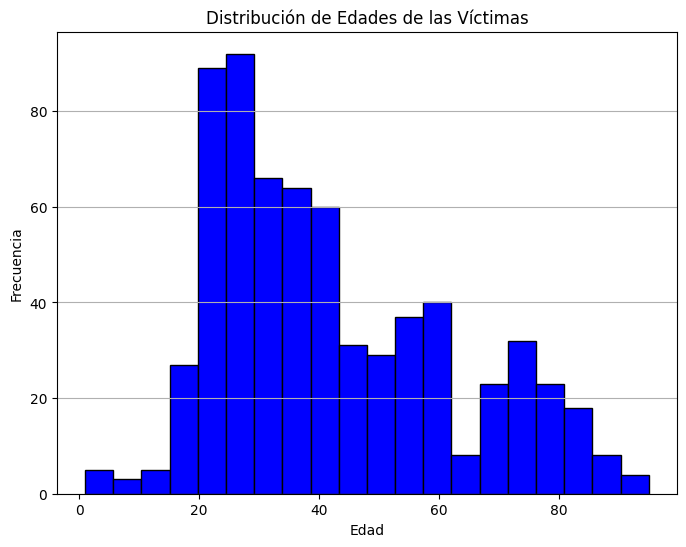

In [92]:
plt.figure(figsize=(8, 6))
plt.hist(combinado['EDAD'], bins=20, color='blue', edgecolor='black')
plt.title('Distribución de Edades de las Víctimas')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(axis='y')
plt.show()

Se oberseva que el rango de edades entre los 20 y 40 años son los mas afectados pero esto puede deberse a que estas son las edades donde hay mas conductores activos, sin embargo el pico cercano a los 30 puede deberse a otras razones.

## Relacion TIPO_DE_CALLE - NUMERO DE VICTIMAS

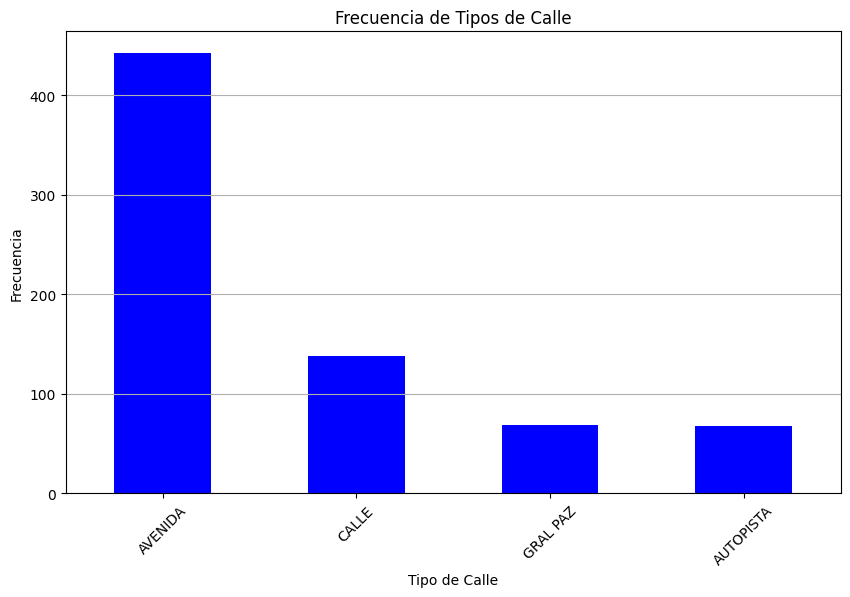

In [ ]:
plt.figure(figsize=(10, 6))
combinado['TIPO_DE_CALLE'].value_counts().plot(kind='bar', color='blue')
plt.title('Frecuencia de Tipos de Calle')
plt.xlabel('Tipo de Calle')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

notamos un dominio de la categoria AVENIDA esto puede deberse a que las caracteristicas de esta categoria como su liminite de velocidad y amplitud presentan un ambiente optimo para la ocurrencia de siniestros viales. las categorias AUTOPISTA y GRAL PAZ parecen ser en la que menos siniestros ocurren

## Relacion MM - N_VICTIMAS

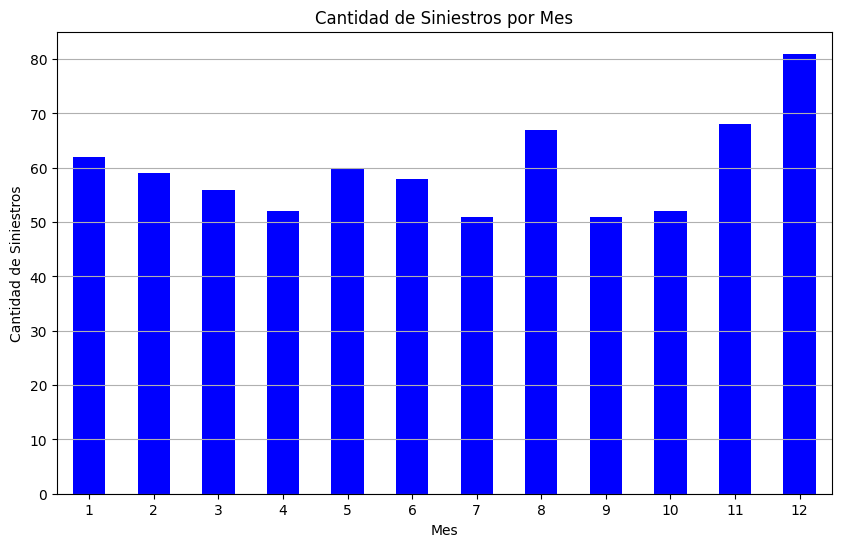

In [ ]:
plt.figure(figsize=(10, 6))
combinado.groupby('MM')['N_VICTIMAS'].sum().plot(kind='bar',color='blue')
plt.title('Cantidad de Siniestros por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Siniestros')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

Se observa que el mes 12  contiene la mayor cantidad de homicidios. Esto se puede deber a la cantidad de visitantes en la ciudad porque coincide con festividades